In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.io as pio
pio.renderers.default = 'notebook'
from plotly.offline import init_notebook_mode
init_notebook_mode(connected = True)
import warnings
warnings.filterwarnings("ignore")
import plotly.graph_objects as go
import plotly.express as px

In [2]:
data = pd.read_csv("DATAFRAMES/Country_data2.csv")
df = pd.DataFrame(data)
df

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


In [3]:
n_rows, n_columns = df.shape
print(f'The dataset contains {n_rows} rows and {n_columns} columns')

The dataset contains 167 rows and 10 columns


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


Терминът "gdpp на глава от населението" (брутен вътрешен продукт на глава от населението) се отнася до мярка за икономическото производство на държава на човек. Изчислява се чрез разделяне на общия брутен вътрешен продукт (БВП) на дадена страна на нейното население. БВП на глава от населението често се използва като индикатор за средното икономическо благосъстояние или стандарт на живот на населението в дадена страна.

In [11]:
df['exports'] = df['exports'] * df['gdpp']/100
df['imports'] = df['imports'] * df['gdpp']/100
df['health'] = df['health'] * df['gdpp']/100
df.sample(5)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
2,Algeria,27.3,3.022320e+11,3.282050e+10,2.471376e+11,12900,16.100,76.5,2.89,4460
51,Estonia,4.5,7.273728e+14,5.840290e+13,6.653863e+14,22700,1.740,76.0,1.72,14600
110,Netherlands,4.5,1.166112e+18,1.927325e+17,1.030066e+18,45500,0.848,80.7,1.79,50300
61,Grenada,14.6,3.814010e+12,9.390799e+11,7.884425e+12,11200,0.480,71.3,2.24,7370
52,Fiji,24.1,1.366737e+11,1.149194e+10,1.510978e+11,7350,4.230,65.3,2.67,3650


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
child_mort,167.0,38.270060,40.328931,2.600000,8.2500,19.300,62.10,208.00
exports,167.0,7420.618847,17973.885795,1.076920,447.1400,1777.440,7278.00,183750.00
health,167.0,1056.733204,1801.408906,12.821200,78.5355,321.886,976.94,8663.60
imports,167.0,6588.352108,14710.810418,0.651092,640.2150,2045.580,7719.60,149100.00
income,167.0,17144.688623,19278.067698,609.000000,3355.0000,9960.000,22800.00,125000.00
inflation,167.0,7.781838,10.570700,-4.210000,1.8100,5.390,10.75,104.00
life_expec,167.0,70.555689,8.893172,32.100000,65.3000,73.100,76.80,82.80
total_fer,167.0,2.947964,1.513848,1.150000,1.7950,2.410,3.88,7.49
gdpp,167.0,12964.155689,18328.704809,231.000000,1330.0000,4660.000,14050.00,105000.00


In [13]:
print(f'Duplicated data: {len(df[df.duplicated()])}' )

Duplicated data: 0


In [14]:
def summary(data):
    summ = pd.DataFrame()
    summ['dataTypes'] = data.dtypes
    summ['Total'] = data.count()
    summ['unique'] = data.nunique()
    summ['missing'] = data.isnull().sum()
    summ['missing%'] = data.isnull().sum() / len(data) * 100
    stats = data.describe().transpose()
    summ['min'] = stats['min']
    summ['max'] = stats['max']
    summ['avg'] = stats['mean']
    summ['standard deveiation'] = stats['std']
    return summ

summary(df).style.background_gradient(cmap = 'Greens').highlight_null(color='purple')

,dataTypes,Total,unique,missing,missing%,min,max,avg,standard deveiation
country,object,167,167,0,0.000000,nan,nan,nan,nan
child_mort,float64,167,139,0,0.000000,2.600000,208.000000,38.270060,40.328931
exports,float64,167,167,0,0.000000,1355.304043,234516737109374992384.000000,1692723281567739648.000000,18209277240352641024.000000
health,float64,167,167,0,0.000000,1762.503015,10412543127656249344.000000,114466226495867504.000000,883218226669479296.000000
imports,float64,167,167,0,0.000000,5956.044671,190293580968749989888.000000,1350773833774423552.000000,14763242688194775040.000000
income,int64,167,156,0,0.000000,609.000000,125000.000000,17144.688623,19278.067698
inflation,float64,167,156,0,0.000000,-4.210000,104.000000,7.781838,10.570700
life_expec,float64,167,127,0,0.000000,32.100000,82.800000,70.555689,8.893172
total_fer,float64,167,138,0,0.000000,1.150000,7.490000,2.947964,1.513848
gdpp,int64,167,157,0,0.000000,231.000000,105000.000000,12964.155689,18328.704809


In [15]:
df1 = df.copy()
df1

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,2.859900e+05,2.167804e+05,1.284095e+06,1610,9.44,56.2,5.82,553
1,Albania,16.6,1.310684e+11,3.066064e+10,2.274972e+11,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,3.022320e+11,3.282050e+10,2.471376e+11,12900,16.10,76.5,2.89,4460
3,Angola,119.0,1.205414e+11,5.514334e+09,8.300524e+10,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,1.500273e+14,1.988274e+13,1.942112e+14,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,3.198340e+10,3.603280e+09,3.617007e+10,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,1.725232e+14,2.972242e+13,1.065406e+14,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,3.638817e+08,3.456877e+07,4.053238e+08,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,1.516174e+08,2.617927e+07,1.738546e+08,4480,23.60,67.5,4.67,1310


In [16]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
child_mort,167.0,3.827006e+01,4.032893e+01,2.600000,8.250000e+00,1.930000e+01,6.210000e+01,2.080000e+02
exports,167.0,1.692723e+18,1.820928e+19,1355.304043,1.869376e+08,3.889210e+11,5.380551e+14,2.345167e+20
health,167.0,1.144662e+17,8.832182e+17,1762.503015,3.698475e+07,6.983467e+10,5.268882e+13,1.041254e+19
imports,167.0,1.350774e+18,1.476324e+19,5956.044671,2.455281e+08,4.924055e+11,5.260053e+14,1.902936e+20
income,167.0,1.714469e+04,1.927807e+04,609.000000,3.355000e+03,9.960000e+03,2.280000e+04,1.250000e+05
inflation,167.0,7.781838e+00,1.057070e+01,-4.210000,1.810000e+00,5.390000e+00,1.075000e+01,1.040000e+02
life_expec,167.0,7.055569e+01,8.893172e+00,32.100000,6.530000e+01,7.310000e+01,7.680000e+01,8.280000e+01
total_fer,167.0,2.947964e+00,1.513848e+00,1.150000,1.795000e+00,2.410000e+00,3.880000e+00,7.490000e+00
gdpp,167.0,1.296416e+04,1.832870e+04,231.000000,1.330000e+03,4.660000e+03,1.405000e+04,1.050000e+05


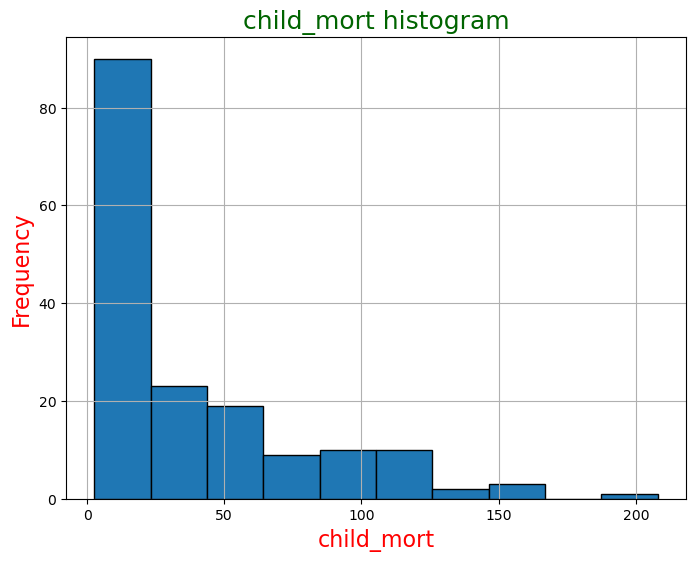

In [17]:
plt.figure(figsize = (8,6))
plt.hist(df1["child_mort"], ec = 'black', )
plt.xlabel("child_mort", fontsize = 16, color = 'red')
plt.ylabel("Frequency", fontsize = 16, color = 'red')
plt.title("child_mort histogram", fontsize = 18, color = 'darkgreen')
plt.grid()
plt.show()

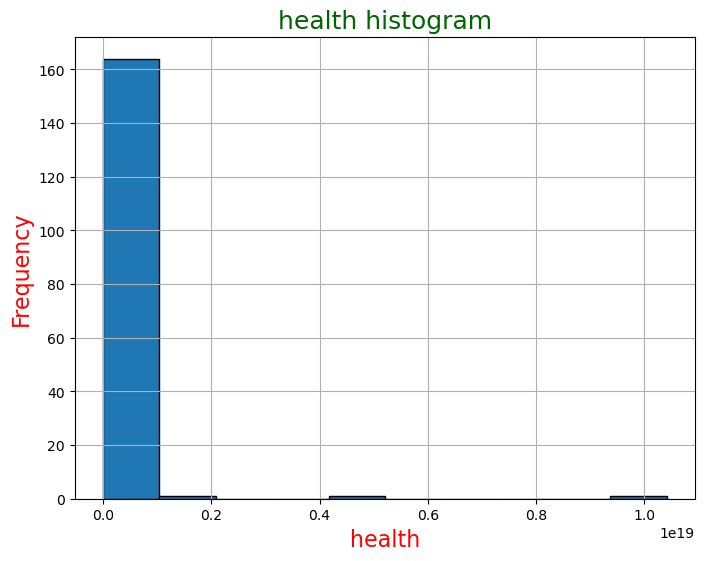

In [18]:
plt.figure(figsize = (8,6))
plt.hist(df1["health"], ec = 'black', )
plt.xlabel("health", fontsize = 16, color = 'red')
plt.ylabel("Frequency", fontsize = 16, color = 'red')
plt.title("health histogram", fontsize = 18, color = 'darkgreen')
plt.grid()
plt.show()

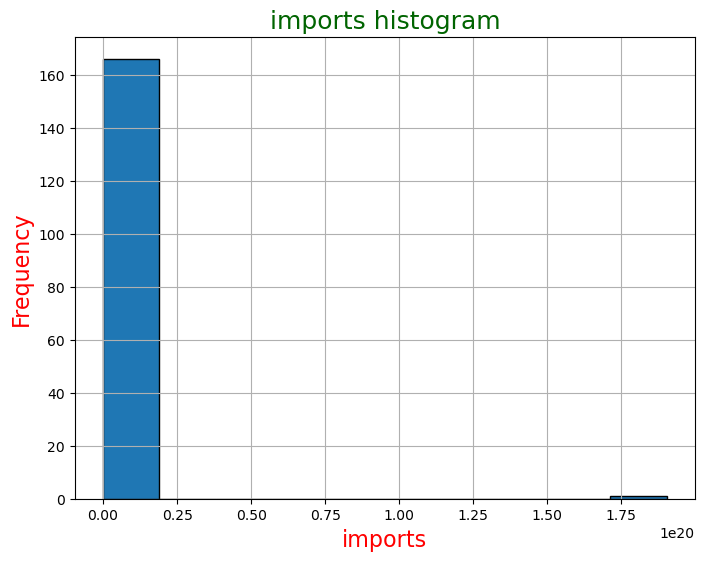

In [19]:
plt.figure(figsize = (8,6))
plt.hist(df1["imports"], ec = 'black', )
plt.xlabel("imports", fontsize = 16, color = 'red')
plt.ylabel("Frequency", fontsize = 16, color = 'red')
plt.title("imports histogram", fontsize = 18, color = 'darkgreen')
plt.grid()
plt.show()

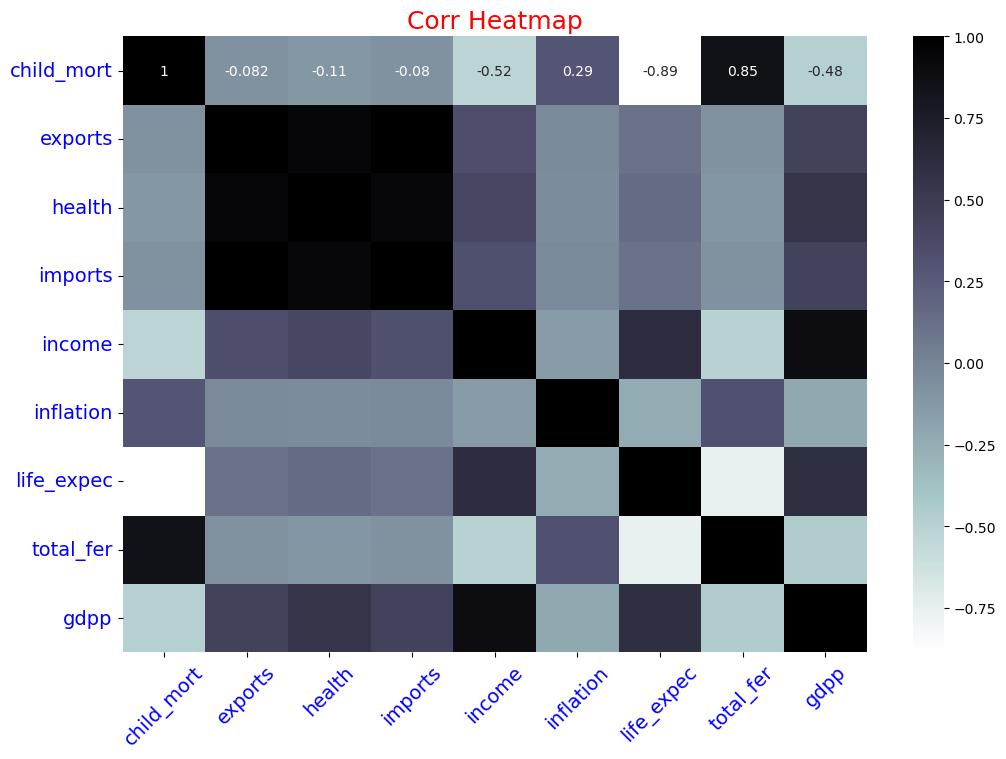

In [21]:
# Calculate the correlation matrix
correlation_matrix = df1.select_dtypes(["int64", "float64"]).corr()

# Set the size of the figure
plt.figure(figsize=(12,8))

# Plot the heatmap
heatmap = sns.heatmap(correlation_matrix, annot=True, cmap='bone_r')

# Set the title of the plot
plt.title("Corr Heatmap", color='red', fontsize=18)

# Adjust the position of the plot

# Change the font size and rotation of x-axis labels
heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=45, fontsize=14, color = 'blue' )

# Change the font size and rotation of y-axis labels
heatmap.set_yticklabels(heatmap.get_yticklabels(), rotation=0, fontsize=14,color = 'blue')

# Show the plot
plt.show()

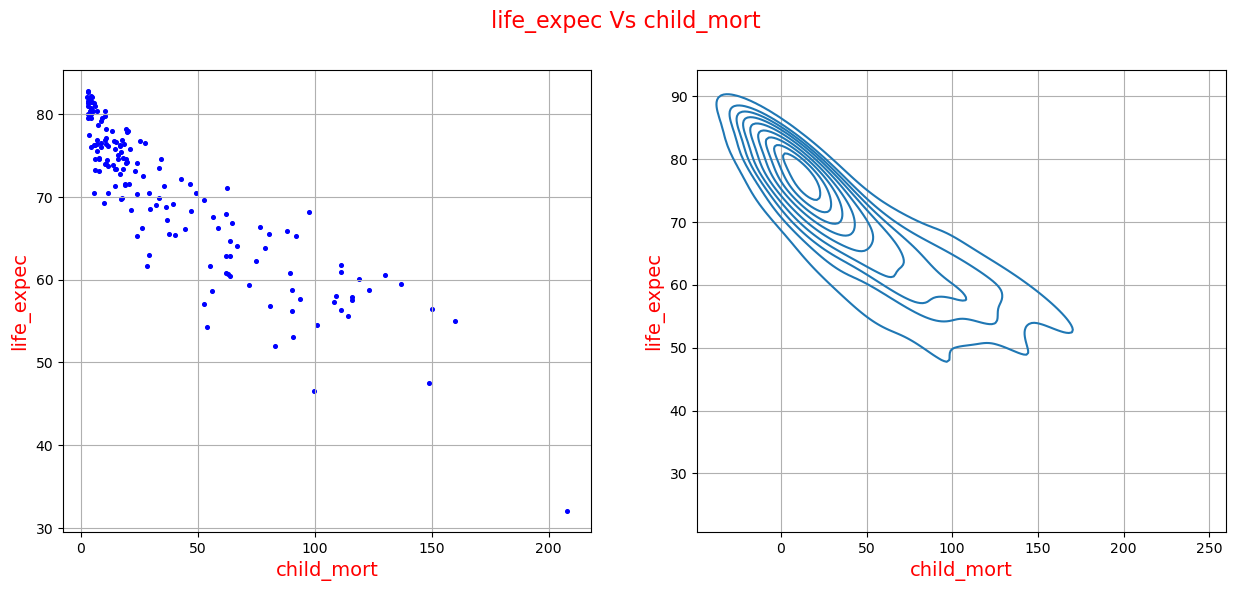

In [22]:
plt.figure(figsize = (15,6))
plt.subplot(1,2,1)
plt.scatter(df1["child_mort"], df1["life_expec"], s=7, color = 'blue')
plt.xlabel("child_mort", fontsize = 14, color = 'red')
plt.ylabel("life_expec", fontsize = 14, color = 'red')
plt.grid()

plt.subplot(1,2,2)
sns.kdeplot(x="child_mort", y="life_expec", data = df1)
plt.xlabel("child_mort", fontsize = 14, color = 'red')
plt.ylabel("life_expec", fontsize = 14, color = 'red')
plt.suptitle("life_expec Vs child_mort",fontsize = 16, color = 'red')
plt.grid()
plt.show()

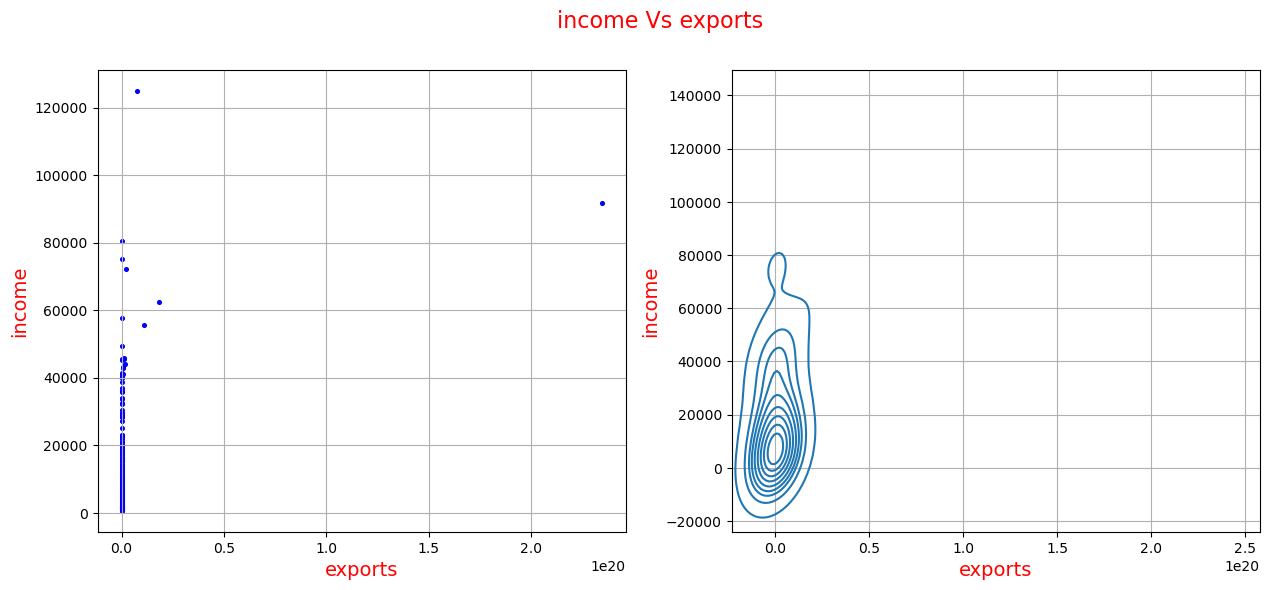

In [23]:
plt.figure(figsize = (15,6))
plt.subplot(1,2,1)
plt.scatter(df1["exports"], df1["income"], s=7, color = 'blue')
plt.xlabel("exports", fontsize = 14, color = 'red')
plt.ylabel("income", fontsize = 14, color = 'red')
plt.grid()

plt.subplot(1,2,2)
sns.kdeplot(x="exports", y="income", data = df1)
plt.xlabel("exports", fontsize = 14, color = 'red')
plt.ylabel("income", fontsize = 14, color = 'red')
plt.suptitle("income Vs exports",fontsize = 16, color = 'red')
plt.grid()
plt.show()

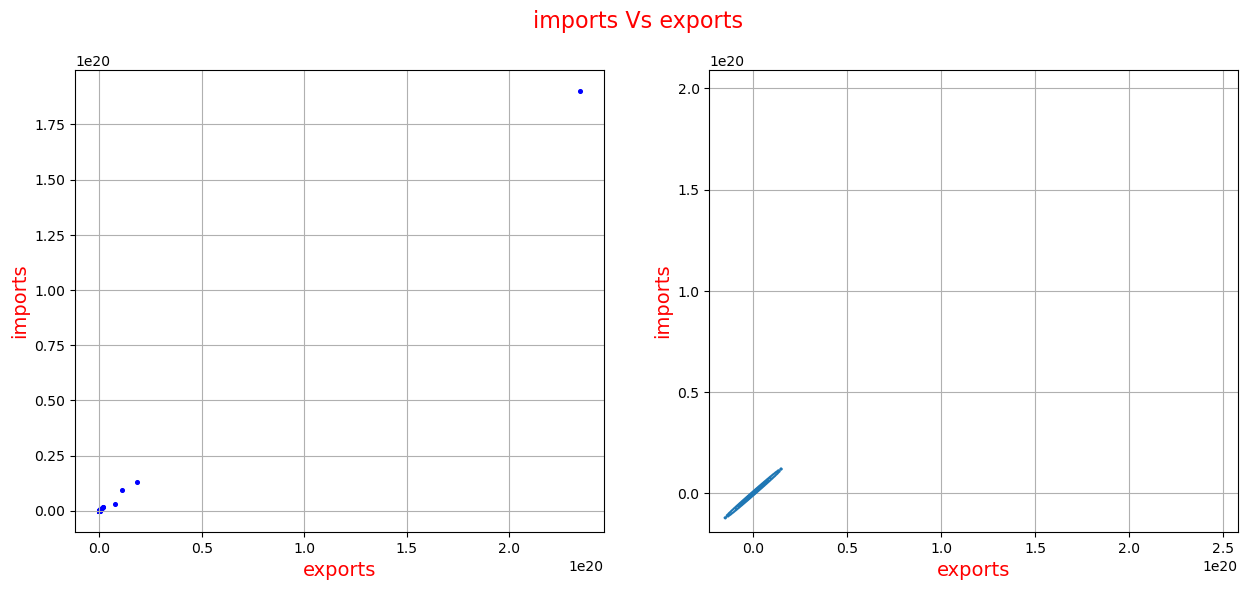

In [24]:
plt.figure(figsize = (15,6))
plt.subplot(1,2,1)
plt.scatter(df1["exports"], df1["imports"], s=7, color = 'blue')
plt.xlabel("exports", fontsize = 14, color = 'red')
plt.ylabel("imports", fontsize = 14, color = 'red')
plt.grid()

plt.subplot(1,2,2)
sns.kdeplot(x="exports", y="imports", data = df1)
plt.xlabel("exports", fontsize = 14, color = 'red')
plt.ylabel("imports", fontsize = 14, color = 'red')
plt.suptitle("imports Vs exports",fontsize = 16, color = 'red')
plt.grid()
plt.show()


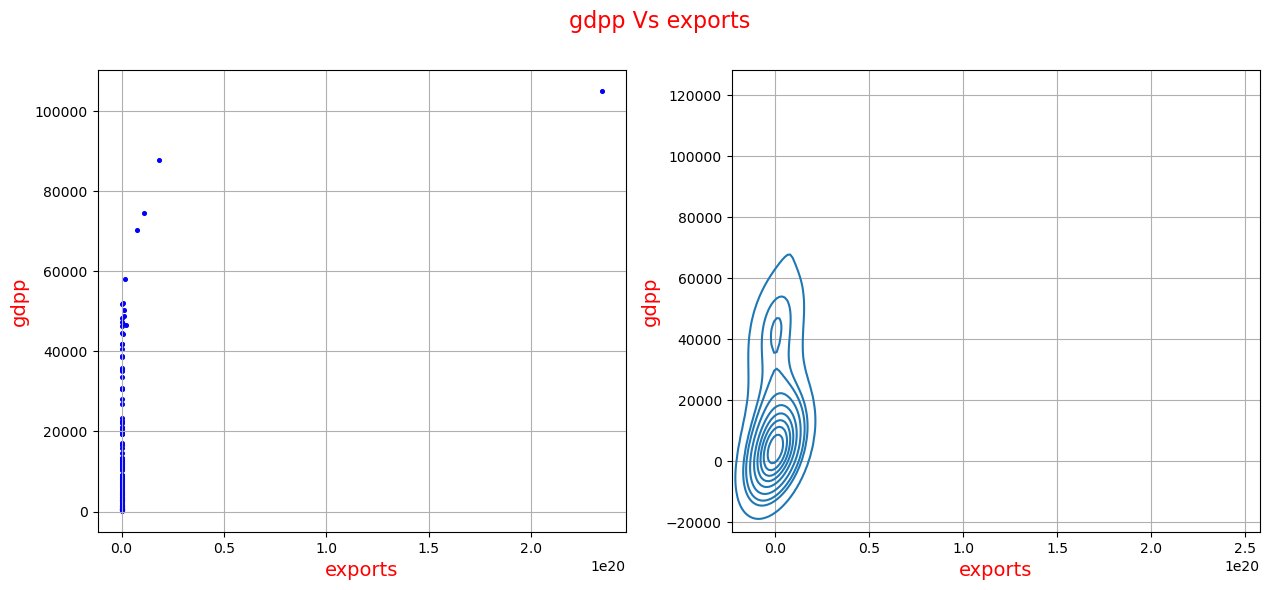

In [25]:
plt.figure(figsize = (15,6))
plt.subplot(1,2,1)
plt.scatter(df1["exports"], df1["gdpp"], s=7, color = 'blue')
plt.xlabel("exports", fontsize = 14, color = 'red')
plt.ylabel("gdpp", fontsize = 14, color = 'red')
plt.grid()

plt.subplot(1,2,2)
sns.kdeplot(x="exports", y="gdpp", data = df1)
plt.xlabel("exports", fontsize = 14, color = 'red')
plt.ylabel("gdpp", fontsize = 14, color = 'red')
plt.suptitle("gdpp Vs exports",fontsize = 16, color = 'red')
plt.grid()
plt.show()

# PCA

In [26]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn import metrics
from sklearn.pipeline import make_pipeline

In [27]:
df2 = df1.copy()
df2.drop(columns = ["country"], inplace = True)
df2

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,2.859900e+05,2.167804e+05,1.284095e+06,1610,9.44,56.2,5.82,553
1,16.6,1.310684e+11,3.066064e+10,2.274972e+11,9930,4.49,76.3,1.65,4090
2,27.3,3.022320e+11,3.282050e+10,2.471376e+11,12900,16.10,76.5,2.89,4460
3,119.0,1.205414e+11,5.514334e+09,8.300524e+10,5900,22.40,60.1,6.16,3530
4,10.3,1.500273e+14,1.988274e+13,1.942112e+14,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...
162,29.2,3.198340e+10,3.603280e+09,3.617007e+10,2950,2.62,63.0,3.50,2970
163,17.1,1.725232e+14,2.972242e+13,1.065406e+14,16500,45.90,75.4,2.47,13500
164,23.3,3.638817e+08,3.456877e+07,4.053238e+08,4490,12.10,73.1,1.95,1310
165,56.3,1.516174e+08,2.617927e+07,1.738546e+08,4480,23.60,67.5,4.67,1310


In [28]:
scaler = StandardScaler()
scaled_df2 = scaler.fit_transform(df2)

In [29]:
pca = PCA()
pca.fit(scaled_df2)

PCA()

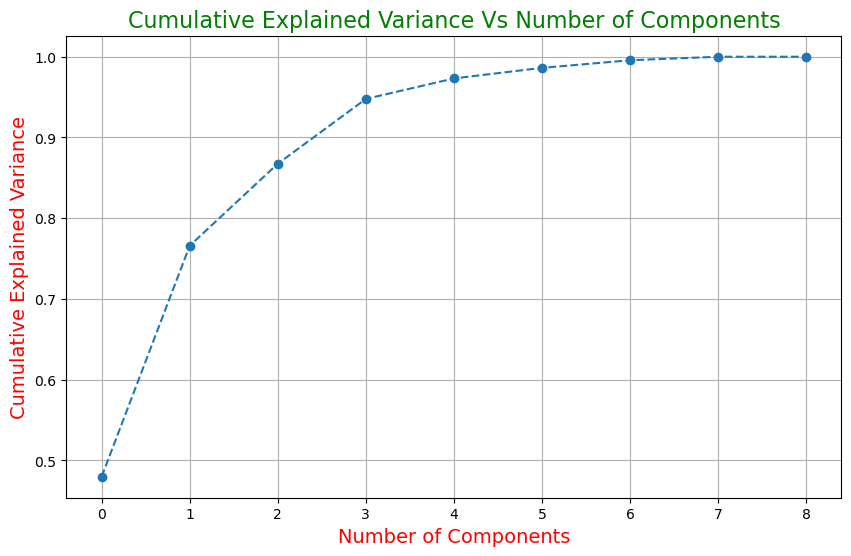

In [30]:
plt.figure (figsize = (10,6))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker = "o", linestyle = "--")
plt.xlabel('Number of Components', fontsize = 14, color = 'red')
plt.ylabel('Cumulative Explained Variance', fontsize = 14, color = 'red')
plt.title('Cumulative Explained Variance Vs Number of Components', fontsize = 16, color = 'green')
plt.grid()
plt.show()

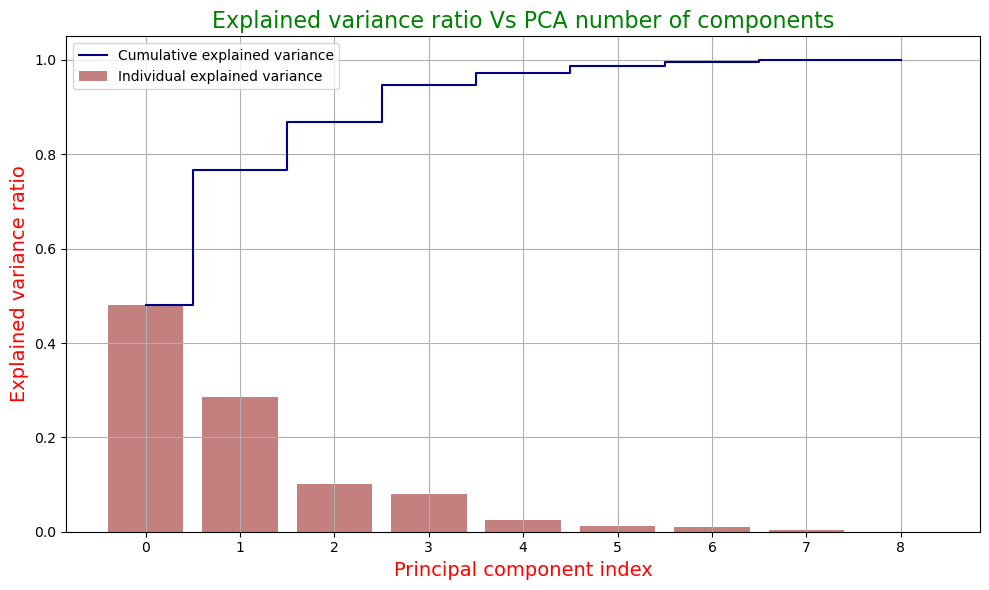

In [31]:
exp_var_pca = pca.explained_variance_ratio_

cum_sum_eigenvalues = np.cumsum(exp_var_pca)
plt.figure(figsize=(10, 6))
plt.bar(range(0,len(exp_var_pca)), exp_var_pca, alpha=0.5, align='center', label='Individual explained variance', color = 'darkred')

plt.step(range(0,len(cum_sum_eigenvalues)), cum_sum_eigenvalues, where='mid',label='Cumulative explained variance', color = 'darkblue')
plt.ylabel('Explained variance ratio', fontsize = 14, color = 'red')
plt.xlabel('Principal component index', fontsize = 14, color = 'red')
plt.title('Explained variance ratio Vs PCA number of components', fontsize = 16 , color = 'green')
plt.legend(loc='best')
plt.tight_layout()
plt.xticks(range(0,9,1))
plt.grid()
plt.show()

In [33]:
pca.explained_variance_ratio_

array([4.79860628e-01, 2.86068697e-01, 1.01554705e-01, 8.02272557e-02,
       2.54013822e-02, 1.30660777e-02, 9.45137285e-03, 4.35848073e-03,
       1.14019100e-05])

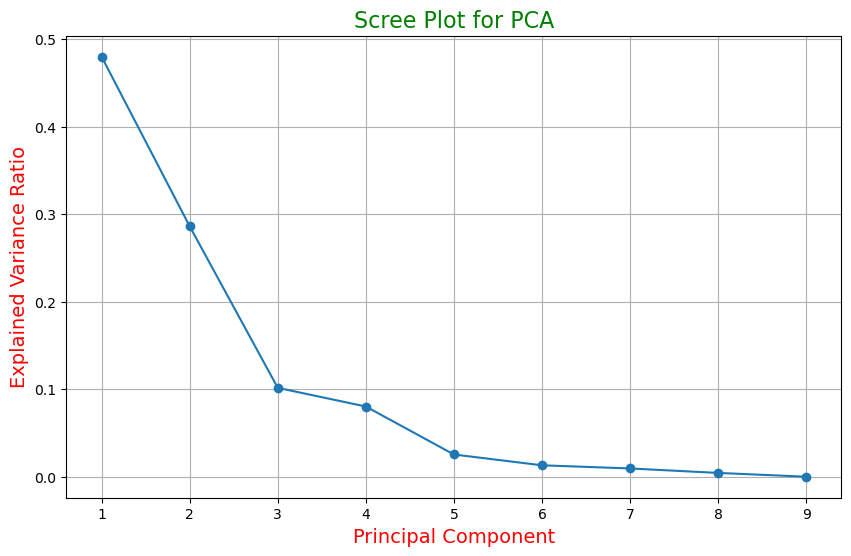

In [34]:
plt.figure(figsize=(10, 6))
plt.plot(np.arange(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, marker='o')
plt.xlabel('Principal Component', fontsize = 14, color = 'red')
plt.ylabel('Explained Variance Ratio', fontsize = 14, color = 'red')
plt.title('Scree Plot for PCA', fontsize = 16, color = 'green')
plt.yticks(np.arange(0,0.6,0.1))
plt.grid()
plt.show()

In [35]:
n_components = 5
pca = PCA(n_components = n_components)
df2_pca = pca.fit_transform(scaled_df2)

In [36]:
explained_variance_ratio = pca.explained_variance_ratio_
print("Explained Variance Ratio:", explained_variance_ratio)

Explained Variance Ratio: [0.47986063 0.2860687  0.1015547  0.08022726 0.02540138]


In [37]:
cumulative_explained_variance = np.cumsum(explained_variance_ratio)
print("Cumulative Explained Variance:", cumulative_explained_variance)

Cumulative Explained Variance: [0.47986063 0.76592932 0.86748403 0.94771128 0.97311267]


In [38]:
import warnings
warnings.filterwarnings("ignore")

In [39]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Apply KMeans clustering on the PCA-transformed data
kmeans = KMeans(n_clusters=3)
clusters = kmeans.fit_predict(df2_pca)

# Calculate silhouette score
silhouette_avg = silhouette_score(df2_pca, clusters)
print("Silhouette Score:", silhouette_avg)


Silhouette Score: 0.43578501553833404


In [40]:
pca_dataframe = pd.DataFrame(df2_pca[:, :5], columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5'])

In [41]:
pca_dataframe

,PC1,PC2,PC3,PC4,PC5
0,-2.355375,1.664335,-0.237830,0.678699,-0.285672
1,0.290416,-0.870947,-0.458968,-0.907845,0.052746
2,-0.147231,-0.321854,0.660162,-0.802970,-0.408554
3,-2.535706,2.040385,1.050625,0.725664,-0.458663
4,0.671701,-0.932322,-0.466675,-0.301902,-0.182473
...,...,...,...,...,...
162,-0.892731,0.188032,-0.816542,-0.237014,0.047208
163,-0.143705,-0.028174,3.356825,-1.543647,0.036161
164,-0.236813,-0.470514,0.061502,-1.166161,0.155938
165,-1.482423,0.862693,1.122013,-0.479615,-0.549671


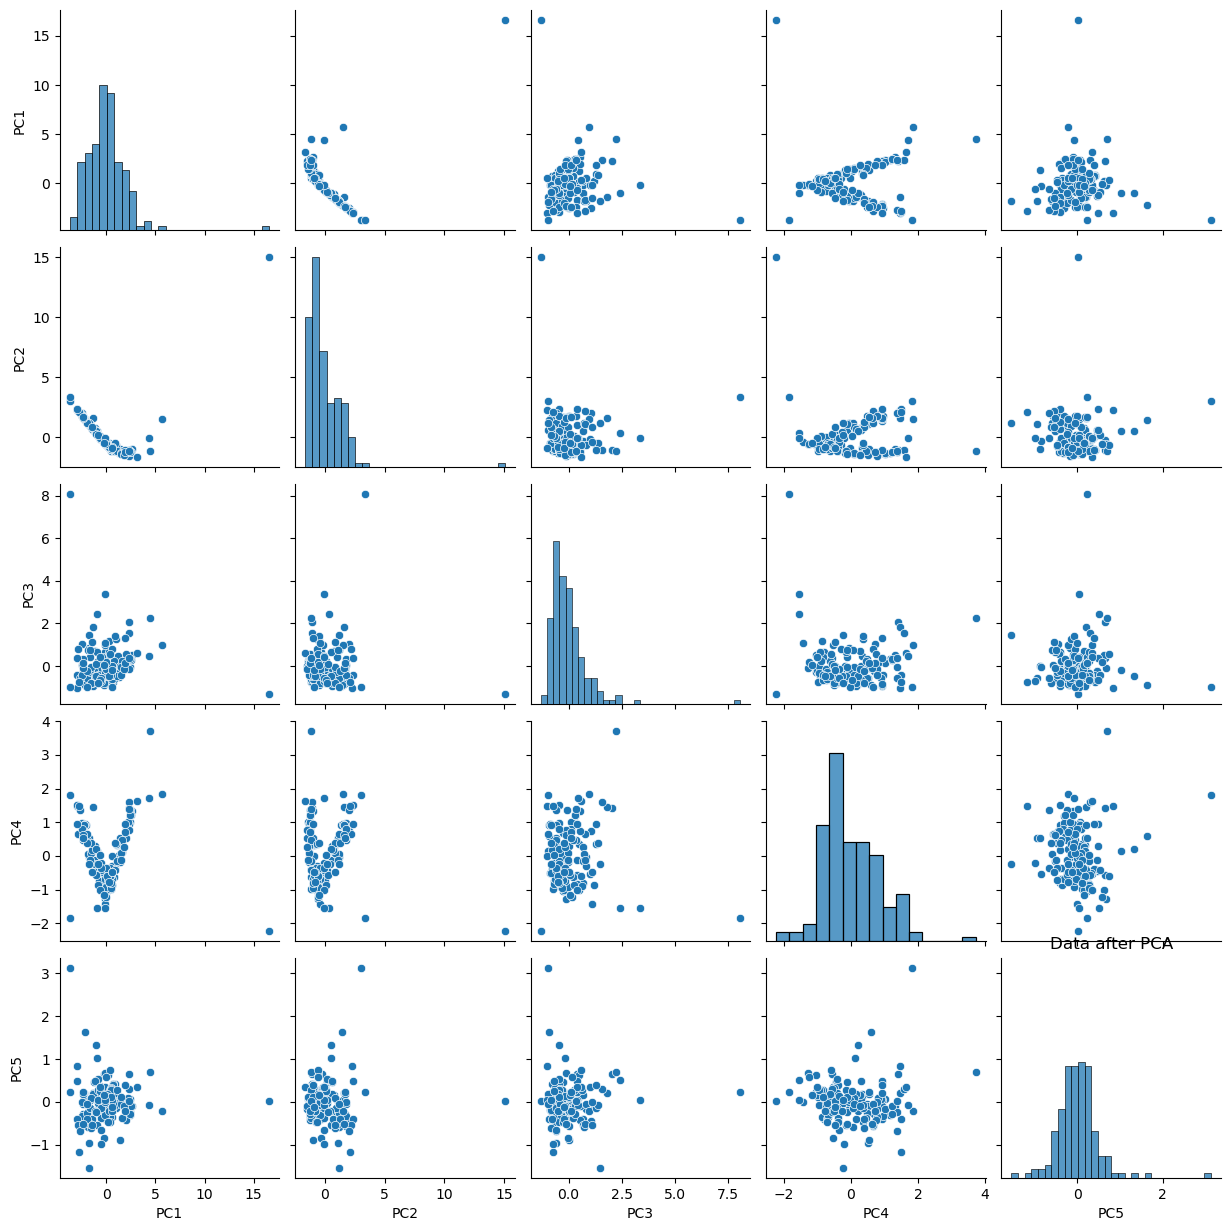

In [42]:
#Create a pairplot to visualize the data
sns.pairplot(pca_dataframe)
plt.title('Data after PCA', y=1)
plt.show()

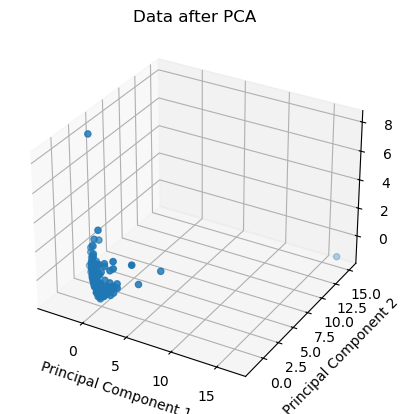

In [43]:
from mpl_toolkits.mplot3d import Axes3D

# Create a 3D scatter plot with the first three principal components
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df2_pca[:, 0], df2_pca[:, 1], df2_pca[:, 2])
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
plt.title('Data after PCA')
plt.show()

In [44]:
new_df = pca_dataframe.copy()
new_df

,PC1,PC2,PC3,PC4,PC5
0,-2.355375,1.664335,-0.237830,0.678699,-0.285672
1,0.290416,-0.870947,-0.458968,-0.907845,0.052746
2,-0.147231,-0.321854,0.660162,-0.802970,-0.408554
3,-2.535706,2.040385,1.050625,0.725664,-0.458663
4,0.671701,-0.932322,-0.466675,-0.301902,-0.182473
...,...,...,...,...,...
162,-0.892731,0.188032,-0.816542,-0.237014,0.047208
163,-0.143705,-0.028174,3.356825,-1.543647,0.036161
164,-0.236813,-0.470514,0.061502,-1.166161,0.155938
165,-1.482423,0.862693,1.122013,-0.479615,-0.549671


In [45]:
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

In [46]:
pip install threadpoolctl==3.1.0

Note: you may need to restart the kernel to use updated packages.


In [47]:
kmeans_set = {"init": "random", "n_init": 10, "max_iter": 300, "random_state":42}

In [48]:
list = []
for k in range(1,11):
    kmeans = KMeans(n_clusters = k, **kmeans_set)
    kmeans.fit_transform(new_df)
    list.append(kmeans.inertia_)

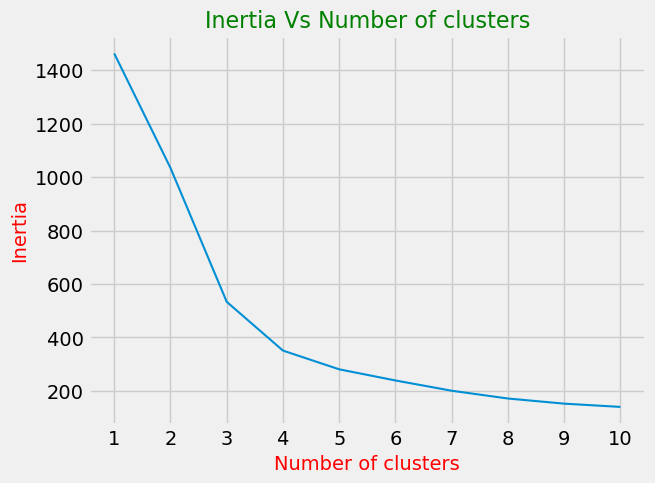

In [49]:
plt.style.use("fivethirtyeight")
plt.plot(range(1,11), list, linewidth = 1.5)
plt.xticks(range(1,11))
plt.xlabel("Number of clusters", fontsize = 14, color = 'red')
plt.ylabel("Inertia", fontsize = 14, color = 'red')
plt.title("Inertia Vs Number of clusters", fontsize = 16, color = 'green')
plt.show()

In [50]:
!pip install kneed

In [51]:
from kneed import KneeLocator

In [52]:
k1 = KneeLocator(range(1,11), list, curve = "convex", direction = "decreasing")
k1.elbow

4

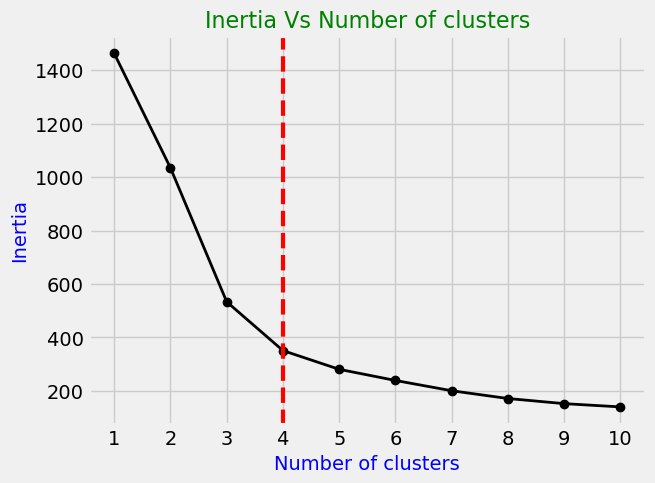

In [53]:
plt.style.use("fivethirtyeight")
plt.plot(range(1,11), list, color = 'black', linewidth = 2, marker = 'o')
plt.xticks(range(1,11))
plt.xlabel("Number of clusters", fontsize = 14, color = 'blue')
plt.ylabel("Inertia", fontsize = 14, color = 'blue')
plt.title("Inertia Vs Number of clusters", fontsize = 16, color = 'green')
plt.axvline(x = k1.elbow, color = 'red', label = 'axvline_full height', ls ='--', linewidth = 3)
plt.show()

In [46]:
pip install yellowbrick

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 282.6/282.6 kB 6.3 MB/s eta 0:00:0000:01
Note: you may need to restart the kernel to use updated packages.


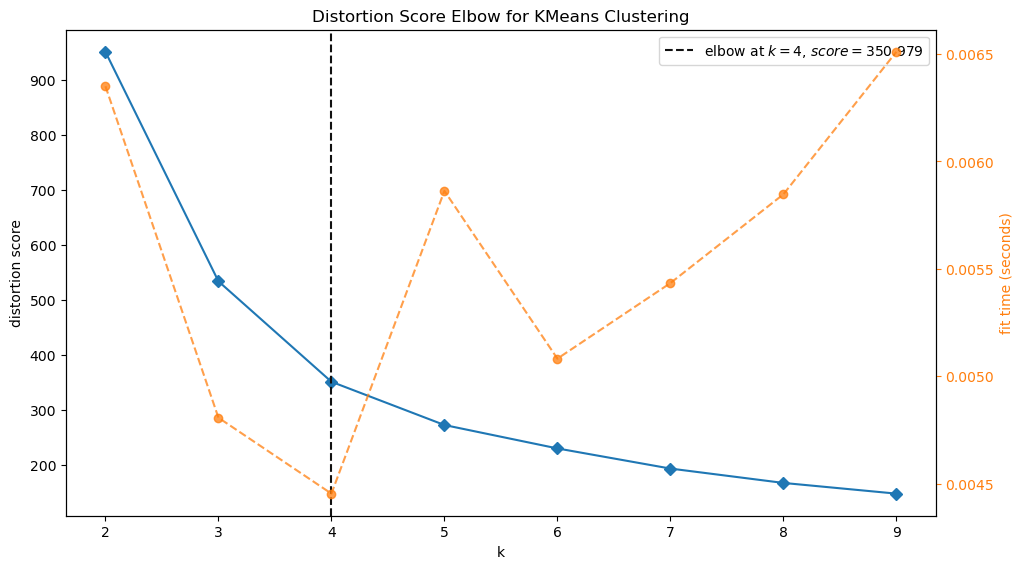

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [54]:
from yellowbrick.cluster import KElbowVisualizer
plt.figure(figsize = (10,6))
plt.style.use("default")
model = KMeans()
visualizer = KElbowVisualizer(model, k = (2,10))
visualizer.fit(new_df)
plt.grid()
visualizer.show()

In [55]:
from sklearn.metrics import silhouette_score

In [56]:
silhouette_coefficient = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters = k, **kmeans_set)
    kmeans.fit(new_df)
    score = silhouette_score(new_df, kmeans.labels_)
    silhouette_coefficient.append(score)

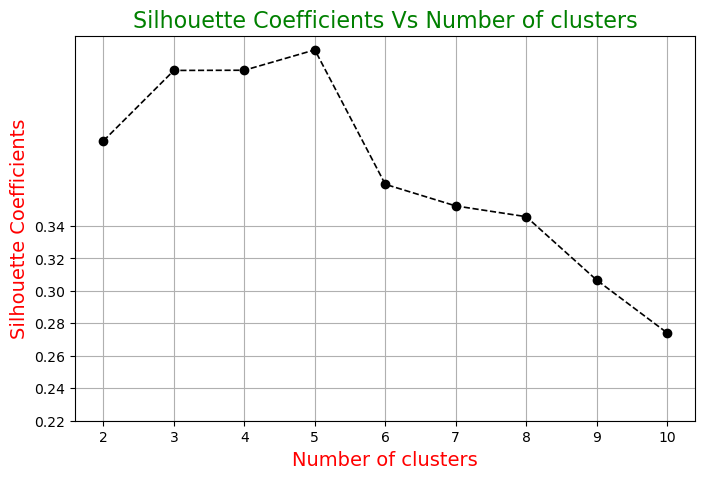

In [57]:
plt.figure(figsize = (8,5))
plt.style.use("default")
plt.plot(range(2,11), silhouette_coefficient, color = 'black', linewidth =1.2, marker = 'o', linestyle = '--')
plt.xticks(range(2,11))
plt.yticks(np.arange(0.22,0.36,0.02))
plt.xlabel("Number of clusters", fontsize = 14, color = 'red')
plt.ylabel("Silhouette Coefficients", fontsize = 14, color = 'red')
plt.title("Silhouette Coefficients Vs Number of clusters", fontsize = 16, color = 'green')
plt.grid()
plt.show()

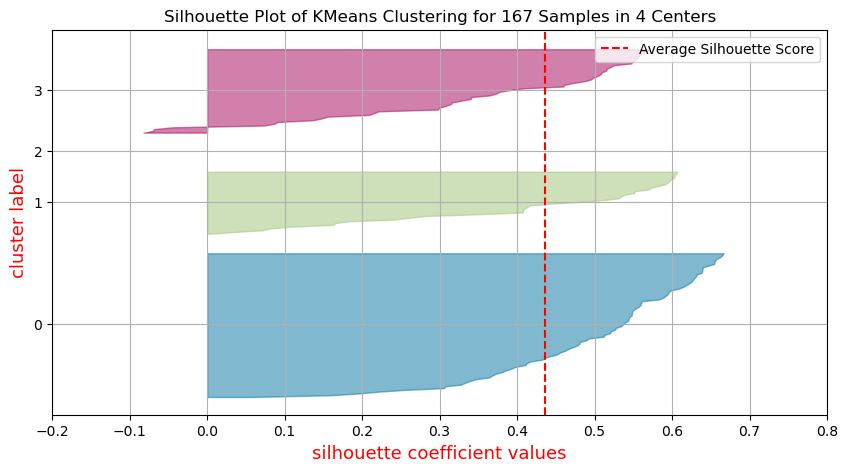

Average silhouette score:  0.4359044051806709


In [58]:
plt.style.use("default")
plt.figure(figsize = (10,5))
from yellowbrick.cluster import SilhouetteVisualizer
km = KMeans(4, random_state = 42)
visualizer = SilhouetteVisualizer (km, colors = 'yellowbrick')
visualizer.fit(new_df)
plt.grid()
plt.xlabel("Silhouette coefficients values", fontsize = 13, color = 'red')
plt.ylabel("Cluster label", fontsize = 13, color = 'red')
visualizer.show()
print("Average silhouette score: ", visualizer.silhouette_score_)

In [59]:
kmeans = KMeans(n_clusters = 4).fit(new_df)
centroids = kmeans.cluster_centers_
print(centroids)

[[ 2.90745142e-02 -5.17544178e-01 -1.74125637e-01 -6.22026262e-01
   4.94959281e-02]
 [-2.02316659e+00  1.39465491e+00  2.44116163e-02  4.56760384e-01
  -4.79043950e-02]
 [ 2.16988563e+00 -1.09872869e+00  4.00551197e-01  8.69642369e-01
  -4.92257879e-02]
 [ 1.66120036e+01  1.50494198e+01 -1.31329847e+00 -2.22547025e+00
   1.28732238e-02]]


In [60]:
labels = kmeans.labels_
labels

array([1, 0, 0, 1, 0, 0, 0, 2, 2, 0, 0, 2, 0, 0, 0, 2, 0, 1, 0, 0, 0, 1,
       0, 2, 0, 1, 1, 0, 1, 2, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 2, 2,
       2, 0, 0, 0, 0, 1, 1, 0, 0, 2, 2, 1, 1, 0, 2, 1, 2, 0, 0, 1, 1, 0,
       1, 0, 2, 0, 0, 0, 1, 2, 2, 2, 0, 2, 0, 0, 1, 1, 2, 0, 1, 0, 0, 1,
       1, 0, 0, 3, 0, 1, 1, 0, 0, 1, 2, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       2, 2, 1, 1, 2, 2, 1, 0, 0, 0, 0, 0, 2, 2, 0, 0, 1, 0, 2, 1, 0, 0,
       1, 2, 0, 2, 1, 1, 2, 2, 0, 0, 1, 0, 2, 2, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 2, 2, 2, 0, 0, 0, 0, 0, 1, 1], dtype=int32)

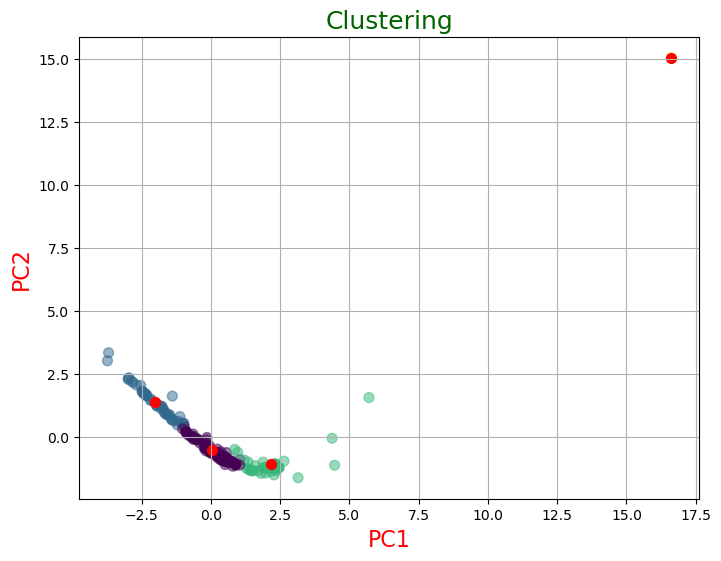

In [61]:
plt.style.use("default")
plt.figure(figsize = (8,6))
plt.scatter(new_df["PC1"], new_df["PC2"], c = kmeans.labels_.astype(float), s = 50, alpha = 0.5)
plt.scatter(centroids[:,0], centroids[:,1], color = 'red', s = 50)
plt.xlabel("PC1", fontsize = 16, color = 'red')
plt.ylabel("PC2", fontsize = 16, color = 'red')
plt.title("Clustering", fontsize = 18, color = 'darkgreen')
plt.grid()
plt.show()

In [62]:
kmeans.inertia_

350.97878779873145

In [63]:
new_df_2 = new_df.copy()
new_df_2["clusters"] = labels
new_df_2

,PC1,PC2,PC3,PC4,PC5,clusters
0,-2.355375,1.664335,-0.237830,0.678699,-0.285672,1
1,0.290416,-0.870947,-0.458968,-0.907845,0.052746,0
2,-0.147231,-0.321854,0.660162,-0.802970,-0.408554,0
3,-2.535706,2.040385,1.050625,0.725664,-0.458663,1
4,0.671701,-0.932322,-0.466675,-0.301902,-0.182473,0
...,...,...,...,...,...,...
162,-0.892731,0.188032,-0.816542,-0.237014,0.047208,0
163,-0.143705,-0.028174,3.356825,-1.543647,0.036161,0
164,-0.236813,-0.470514,0.061502,-1.166161,0.155938,0
165,-1.482423,0.862693,1.122013,-0.479615,-0.549671,1


In [64]:
cluster_2, cluster_1, cluster_3, cluster_0 = new_df_2["clusters"].value_counts()
print(f'Number of sampels are clustered in the 0_cluster: {cluster_0}')
print(f'Number of sampels are clustered in the 1_cluster: {cluster_1}')
print(f'Number of sampels are clustered in the 2_cluster: {cluster_2}')
print(f'Number of sampels are clustered in the 3_cluster: {cluster_3}')

Number of sampels are clustered in the 0_cluster: 1
Number of sampels are clustered in the 1_cluster: 48
Number of sampels are clustered in the 2_cluster: 82
Number of sampels are clustered in the 3_cluster: 36


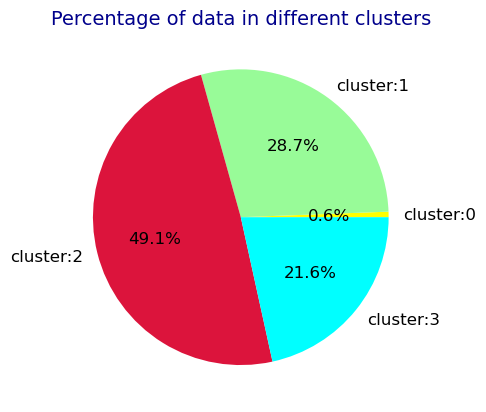

In [65]:
labels = ["cluster:0", "cluster:1", "cluster:2", "cluster:3",]
sizes = [cluster_0, cluster_1, cluster_2, cluster_3]
fig, ax = plt.subplots()
ax.pie(sizes, labels = labels, colors = ["yellow", "palegreen", "crimson", "cyan"], autopct = "%1.1f%%", textprops={'fontsize': 12})
plt.title("Percentage of data in different clusters", color = 'darkblue', fontsize = 14)

plt.show()

In [66]:
new_df

,PC1,PC2,PC3,PC4,PC5
0,-2.355375,1.664335,-0.237830,0.678699,-0.285672
1,0.290416,-0.870947,-0.458968,-0.907845,0.052746
2,-0.147231,-0.321854,0.660162,-0.802970,-0.408554
3,-2.535706,2.040385,1.050625,0.725664,-0.458663
4,0.671701,-0.932322,-0.466675,-0.301902,-0.182473
...,...,...,...,...,...
162,-0.892731,0.188032,-0.816542,-0.237014,0.047208
163,-0.143705,-0.028174,3.356825,-1.543647,0.036161
164,-0.236813,-0.470514,0.061502,-1.166161,0.155938
165,-1.482423,0.862693,1.122013,-0.479615,-0.549671


In [67]:
new_df.describe()

,PC1,PC2,PC3,PC4,PC5
count,1.670000e+02,1.670000e+02,1.670000e+02,1.670000e+02,1.670000e+02
mean,7.445807e-17,2.127373e-17,-5.318434e-18,2.127373e-17,4.304607e-17
std,2.084409e+00,1.609387e+00,9.589048e-01,8.522881e-01,4.795723e-01
min,-3.736195e+00,-1.627233e+00,-1.313298e+00,-2.225470e+00,-1.540526e+00
25%,-1.264182e+00,-9.763404e-01,-5.194939e-01,-5.830472e-01,-2.278730e-01
50%,-5.746157e-02,-4.395962e-01,-1.995673e-01,-1.691434e-01,-3.511840e-02
75%,8.670160e-01,6.926265e-01,3.080321e-01,5.682934e-01,2.154725e-01
max,1.661200e+01,1.504942e+01,8.086120e+00,3.717392e+00,3.131845e+00


In [68]:
from sklearn.cluster import MeanShift
from sklearn.cluster import estimate_bandwidth
from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score

In [69]:
band_width = estimate_bandwidth(new_df)
meanshift = MeanShift(bandwidth = band_width)
meanshift_labels = meanshift.fit_predict(new_df)
silhouette = silhouette_score(new_df, meanshift_labels)

print("band_width: ", band_width, "\n")
print("**********************************\n")
print("silhouette_score: ", silhouette)

band_width:  2.1041538619157065 

**********************************

silhouette_score:  0.2533610829762636


In [70]:
bandwidth = np.arange(0.5, 5, 0.25)
silhouette_score_ = []
calinski_harabasz_score_ = []
n_clusters = []
for i in range(len(bandwidth)):
    meanshift = MeanShift(bandwidth = bandwidth[i])
    meanshift_labels = meanshift.fit_predict(new_df)
    n_clusters_ = len(set(meanshift_labels))
    if (n_clusters_ > 1) & (n_clusters_ < len(new_df)):
        silhouette_score_.append((silhouette_score(new_df, meanshift_labels))) 
        calinski_harabasz_score_.append(calinski_harabasz_score(new_df, meanshift_labels))
        n_clusters.append(n_clusters_)
    else:
        
        pass

In [71]:
meanshift_df = pd.DataFrame({"bandwidth": bandwidth,"n_clusters": n_clusters, "silhouette_score": silhouette_score_, "calinski_harabasz_score": calinski_harabasz_score_})
meanshift_df


,bandwidth,n_clusters,silhouette_score,calinski_harabasz_score
0,0.50,62,0.212861,169.893400
1,0.75,32,0.266889,144.096774
2,1.00,20,0.285031,110.658537
3,1.25,15,0.310901,96.696389
4,1.50,11,0.367790,112.703897
5,1.75,8,0.201578,49.672082
6,2.00,6,0.253361,46.575302
7,2.25,6,0.256135,45.969508
8,2.50,6,0.250420,44.259565
9,2.75,5,0.398890,42.701185
